# Rutas.

In [ ]:
from google.colab import drive # Para poder cargar los archivos que se encuentran en google drive
import os

drive.mount('/content/drive', force_remount=True)

pfc_datos_google_drive_ruta = '/content/drive/My Drive/FICH/Proyecto Final de Carrera (PFC)/Código'
# pfc_datos_google_drive_ruta = '/content/drive/My Drive/Proyecto Final de Carrera (PFC)/Código'

longitud = 7500
#cantidad_ejemplos_sin_interaccion = 1048

x_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "Datos", "x_entrenamiento_l{}.pickle".format(longitud))
y_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "Datos", "y_entrenamiento_l{}.pickle".format(longitud))
x_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "Datos", "x_prueba_l{}.pickle".format(longitud))
y_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "Datos", "y_prueba_l{}.pickle".format(longitud))

dimension_vectores_embedding_glove = 50
glove_ruta = os.path.join(pfc_datos_google_drive_ruta, "glove.6B.{}d.txt".format(dimension_vectores_embedding_glove))
matriz_embeddings_glove_ruta = os.path.join(pfc_datos_google_drive_ruta, "matriz_glove_{}.pickle".format(dimension_vectores_embedding_glove))

vocabulario_ruta = os.path.join(pfc_datos_google_drive_ruta, "vocabulario.pickle")
matriz_embeddings_ruta = os.path.join(pfc_datos_google_drive_ruta, "matriz_embeddings{}.pickle".format(dimension_vectores_embedding_glove))
# matriz_embeddings_ruta = matriz_embeddings_glove_ruta
secuencias_ruta = os.path.join(pfc_datos_google_drive_ruta, "secuencias_dict.pickle")
interacciones_lista_ruta = os.path.join(pfc_datos_google_drive_ruta, "interacciones_lista.txt")
etiquetas_neural_networks_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_entrenamiento.csv")
etiquetas_neural_networks_prueba_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_prueba.csv")
publicaciones_directorio = os.path.join(pfc_datos_google_drive_ruta, "replaced4")
particiones_ruta = os.path.join(pfc_datos_google_drive_ruta, "particiones_l{}_e{}.pickle".format(longitud, dimension_vectores_embedding_glove+2))

# cnn
modelo_arquitectura_ruta = os.path.join(pfc_datos_google_drive_ruta, "modelo_cnn_arquitectura.png")
modelo_guardado_ruta = os.path.join(pfc_datos_google_drive_ruta, "mejor_modelo_cnn_{}.h5")

# rnn
modelo_rnn_arquitectura_ruta = os.path.join(pfc_datos_google_drive_ruta, "modelo_rnn_arquitectura.png")
modelo_rnn_guardado_ruta = os.path.join(pfc_datos_google_drive_ruta, "mejor_modelo_rnn_{}.h5")

# Transformers
modelo_transformers_arquitectura_ruta = os.path.join(pfc_datos_google_drive_ruta, "modelo_transformers_arquitectura.png")
modelo_transformers_guardado_ruta = os.path.join(pfc_datos_google_drive_ruta, "mejor_modelo_transformers_l{}_e{}_{}.h5")
resultados_ruta = os.path.join(pfc_datos_google_drive_ruta, "resultados_transformers_l{}_e{}.txt".format(longitud, dimension_vectores_embedding_glove+2))

# etiquetas_neural_networks_ruta = os.path.join(pfc_datos_google_drive_ruta, "etiquetas_neural_networks_4_v3.csv")

# print(os.listdir('/content/drive/My Drive'))

print("Rutas listas.")

Mounted at /content/drive
Rutas listas.


# Funciones auxiliares.

In [ ]:
import csv
import random
from collections import Counter
import matplotlib.pyplot as pplt


def extender_vocabulario(voc):
    top_palabras_frecuentes = len(voc.word_index)
    secuencia_gen = top_palabras_frecuentes + 1
    voc.index_word[secuencia_gen] = "<GEN>"
    voc.word_index["<GEN>"] = secuencia_gen
    secuencia_droga = top_palabras_frecuentes + 2
    voc.index_word[secuencia_droga] = "<DROGA>"
    voc.word_index["<DROGA>"] = secuencia_droga


def histograma(secuencias, secuencia_gen, secuencia_droga):
    tot = 32000
    posiciones_genes = []
    posiciones_drogas = []
    for ejemplo in secuencias:
        for p, elemento in enumerate(ejemplo):
            if elemento == secuencia_gen:
                if p < tot:
                    posiciones_genes.append(p)
            if elemento == secuencia_droga:
                if p < tot:
                    posiciones_drogas.append(p)
    pplt.figure()
    pplt.subplot(2,1,1)
    pplt.hist(posiciones_genes, bins=150)
    pplt.legend()

    pplt.subplot(2,1,2)
    pplt.hist(posiciones_drogas, bins=150)
    pplt.legend()

    historgama_ruta = os.path.join(pfc_datos_google_drive_ruta, "histograma.png")
    pplt.savefig(historgama_ruta)
    pplt.show()    
    

def cargar_interacciones(in_file):
    """Carga la lista de interacciones del archivo."""
    with open(in_file, encoding="utf8") as f:
        res = [l.strip() for l in f.readlines()]
    return res


def cargar_ifg(etiquetas_archivo_ruta):
    """Carga las etiquetas a usar como ejemplos."""
    interacciones_lista = []
    with open(etiquetas_archivo_ruta, encoding="utf8") as etiquetas:
        lector_csv = csv.reader(etiquetas)
        for linea in lector_csv:
            interacciones_lista.append(linea)
    return interacciones_lista


def cargar_publicaciones():
    # Se cargan las publicaciones en un diccionario: publicaciones_dict[pmid] = contenido
    print("Cargando diccionario de publicaciones...")
    publicaciones_dict = dict()
    publicaciones_en_directorio = os.listdir(publicaciones_directorio)
    tot = len(publicaciones_en_directorio)
    print("Cantidad de archivos:", tot)
    for i, archivo in enumerate(publicaciones_en_directorio):
        pmid = archivo.stem
        print("Leyendo {}/{}".format(i, tot))
        with open(archivo, encoding="utf8") as publicacion:
            texto = publicacion.read()
            publicaciones_dict[pmid] = texto
    print("Diccionario de publicaciones cargado.")
    return publicaciones_dict


def generar_pesos_clases(y):
    """Genera los pesos para las clases según aparezcan en los datos de entrenamiento."""
    
    cc = Counter(y)
    print("Cantidad sin interacción:", cc["sin_interaccion"])
    print("Cantidad inhibitor:", cc["inhibitor"])

    yun = np.unique(y)
    pesos_clases = compute_class_weight("balanced", yun, y)

    pesos = dict(zip(yun, pesos_clases))
    print(pesos)
    interacciones_pesos_dict = {}
    for i, interaccion in enumerate(interacciones):
        interacciones_pesos_dict[i] = pesos[interaccion]
    return interacciones_pesos_dict

print("Listo funciones.")

Listo funciones.


# Codiguito

In [ ]:
import pickle

with open(vocabulario_ruta, "rb") as f:
    voc = pickle.load(f)
    extender_vocabulario(voc)

with open(matriz_embeddings_ruta, "rb") as handle:
    matriz_embeddings = pickle.load(handle)

def sec(w):
    print(w, voc.word_index[w])

def rr(f):
    return round(f, 4)

def emb(w):
    elemb = matriz_embeddings[voc.word_index[w]]
    #print(len(elemb))
    print(w, ":", " & {} & {} & ... & {} & {} & {}".format(rr(elemb[0]), rr(elemb[1]), rr(elemb[-3]), rr(elemb[-2]), rr(elemb[-1])))




for w in "it has been reported that <DROGA> treatment induced a more rapid progression of atherosclerotic lesions in <GEN>".split():
    emb(w)



it :  & -0.0091 & 0.0053 & ... & -0.0072 & 0.0 & 0.0
has :  & 0.0073 & -0.0086 & ... & -0.006 & 0.0 & 0.0
been :  & -0.0057 & -0.0019 & ... & -0.0072 & 0.0 & 0.0
reported :  & 0.0004 & 0.0085 & ... & -0.0007 & 0.0 & 0.0
that :  & 0.0067 & 0.0056 & ... & 0.0 & 0.0 & 0.0
<DROGA> :  & 0.0 & 0.0 & ... & 0.0 & 0.0 & 1.0
treatment :  & -0.0097 & -0.0069 & ... & -0.0004 & 0.0 & 0.0
induced :  & 0.0037 & 0.0027 & ... & 0.0047 & 0.0 & 0.0
a :  & -0.0053 & -0.0088 & ... & 0.0069 & 0.0 & 0.0
more :  & -0.0082 & -0.0002 & ... & -0.0019 & 0.0 & 0.0
rapid :  & 0.009 & 0.0026 & ... & 0.0082 & 0.0 & 0.0
progression :  & -0.0001 & 0.0075 & ... & -0.0091 & 0.0 & 0.0
of :  & -0.005 & 0.0049 & ... & -0.0026 & 0.0 & 0.0
atherosclerotic :  & -0.0084 & 0.0065 & ... & -0.0081 & 0.0 & 0.0
lesions :  & -0.0013 & -0.0024 & ... & -0.009 & 0.0 & 0.0
in :  & -0.008 & -0.0008 & ... & 0.0094 & 0.0 & 0.0
<GEN> :  & 0.0 & 0.0 & ... & 0.0 & 1.0 & 0.0


# Generación de secuencias de ejemplos.

In [ ]:
import os
import numpy as np
import csv
import random
import math
from keras.preprocessing import text, sequence
from keras.utils import np_utils
import pickle
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import h5py

# CONFIGURAR PARA LA CREACIÓN DE EJEMPLOS:

glove_o_word2vec = "glove" # "glove" o "word2vec"
vocabulario_bool = False
embeddings_bool = False
glove_bool = True
dimension_embedding = dimension_vectores_embedding_glove
secuencias_bool = False
padtrunc_where = "post"
guardar_archivos = True

excluir_interacciones_lista = [] #"sin_interaccion"]
porcentaje_prueba = 0.2
maxima_longitud_ejemplos = longitud
cantidad_sin_interaccion = 1048


def cargar_ifg(etiquetas_archivo_ruta, # Archivo de etiquetas: pmid, gen, droga, interacción
               interacciones_lista_ruta, # Lista de etiquetas a considerar
               excluir_interacciones_lista,
               cantidad_sin_interaccion): # Lista de interacciones que no se cargarán
    # Carga de las interacciones a considerar en una lista
    interacciones_considerar = list()
    with open(interacciones_lista_ruta, encoding="utf8") as interacciones:
        for interaccion in interacciones:
            interacciones_considerar.append(interaccion.strip())
    # Carga de las interacciones fármaco-gen
    interacciones_lista = list()
    sin_interaccion_lista = list()
    with open(etiquetas_archivo_ruta, encoding="utf8") as etiquetas:
        lector_csv = csv.reader(etiquetas, delimiter=',', quoting=csv.QUOTE_ALL)
        for linea in lector_csv:
            if linea[3] not in excluir_interacciones_lista:
              if linea[3] not in interacciones_considerar:
                linea[3] = "other"
                interacciones_lista.append(linea)
              # elif linea[3] == "sin_interaccion":
              #   sin_interaccion_lista.append(linea)
              else:
                interacciones_lista.append(linea)
                
    # for linea in random.sample(sin_interaccion_lista, k=cantidad_sin_interaccion):
    #     interacciones_lista.append(linea)

    return interacciones_lista


def marcar_entidad_en_secuencia(secuencia_lista,
                                vocabulario,
                                ifg_balanceadas_lista,
                                top_palabras_frecuentes):

    for i in range(0, len(secuencia_lista), 1):
        print("Procesando el ejemplo: {}/{}".format(i+1,len(secuencia_lista)))
        # No hace más falta llamar al compactar, este algoritmo ya evita que queden repetidos secuenciales
        ejemplo = secuencia_lista[i]
        gen = ifg_balanceadas_lista[i][1]
        droga = ifg_balanceadas_lista[i][2]

        secuencia_gen = top_palabras_frecuentes+1
        secuencia_droga = top_palabras_frecuentes+2 
    
        ejemplo_reducido = list()
        for elemento in ejemplo:
            palabra = vocabulario.index_word[elemento]
            if palabra.startswith("xxx") and palabra.endswith("xxx"):
                if palabra == "xxx{}xxx".format(gen):
                    elemento = secuencia_gen
                elif palabra == "xxx{}xxx".format(droga):
                    elemento = secuencia_droga
                else:
                    elemento = 0 # anulo todos los otros
            ejemplo_reducido.append(elemento)

        secuencia_lista[i] = ejemplo_reducido

    return secuencia_lista


def crear_ejemplos(archivo_etiquetas_ruta,
                   excluir_interacciones_lista,
                   porcentaje_prueba,
                   maxima_longitud_ejemplos,
                   vocabulario_bool,
                   embeddings_bool,
                   secuencias_bool,
                   dimension_embedding,
                   x_salida, y_salida,
                   padtrunc_where="post", guardar=False):

    ''' Vocabulario '''
    if not porcentaje_prueba:
        porcentaje_prueba = 0.0
    top_palabras_frecuentes = 0
    vocabulario = text.Tokenizer()
    if vocabulario_bool: # Generar el vocabulario
        # Se cargan las publicaciones en un diccionario: publicaciones_dict[pmid] = contenido
        print("Cargando diccionario de publicaciones.")
        publicaciones_dict = dict()
        publicaciones_en_directorio = os.listdir(publicaciones_directorio)
        tot = len(publicaciones_en_directorio)
        print("Cantidad de archivos:", tot)
        for i, archivo in enumerate(publicaciones_en_directorio):
            pmid = archivo.split(".")[0]
            print("Leyendo {}/{}".format(i, tot))
            archivo_ruta = os.path.join(publicaciones_directorio, archivo)
            with open(archivo_ruta, encoding="utf8") as publicacion:
                texto = publicacion.read()
                publicaciones_dict[pmid] = texto
        print("Diccionario de publicaciones cargado.")

        # Se genera el vocabulario
        print("Generando vocabulario.")
        vocabulario.fit_on_texts(publicaciones_dict.values())
        with open(vocabulario_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(vocabulario, handle, protocol=pickle.HIGHEST_PROTOCOL)

        print("Vocabulario generado.")
    else: # Cargar vocabulario pre-guardado
        print("Cargando diccionario de publicaciones.")
        publicaciones_dict = dict()
        publicaciones_en_directorio = os.listdir(publicaciones_directorio)
        tot = len(publicaciones_en_directorio)
        print("Cantidad de archivos:", tot)
        for i, archivo in enumerate(publicaciones_en_directorio):
            pmid = archivo.split(".")[0]
            print("Leyendo {}/{}".format(i, tot))
            archivo_ruta = os.path.join(publicaciones_directorio, archivo)
            with open(archivo_ruta, encoding="utf8") as publicacion:
                texto = publicacion.read()
                publicaciones_dict[pmid] = texto
        print("Diccionario de publicaciones cargado.")
        with open(vocabulario_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            vocabulario = pickle.load(handle)

        # maxima_longitud_ejemplos = len(vocabulario.index_word)

        print("Vocabulario pre-guardado cargado.")
    
    top_palabras_frecuentes = len(vocabulario.word_index)
    secuencia_gen = top_palabras_frecuentes + 1
    vocabulario.index_word[secuencia_gen] = "<GEN>"
    vocabulario.word_index["<GEN>"] = secuencia_gen
    secuencia_droga = top_palabras_frecuentes + 2
    vocabulario.index_word[secuencia_droga] = "<DROGA>"
    vocabulario.word_index["<DROGA>"] = secuencia_droga
    #top_palabras_frecuentes += 2

    ''' Embeddings '''
    matriz_embeddings = 0
    if glove_o_word2vec == "word2vec":
        if embeddings_bool: # Generar vectores de embedding
            print("Generando diccionario de embeddings.")
            embeddings_dict = dict()
            palabras_lista = list(vocabulario.word_index.keys())
            modelo_word2vec = Word2Vec([palabras_lista], size=dimension_embedding, min_count=1) # , workers=8

            gen_emb = np.zeros((1, dimension_embedding+2))
            gen_emb[0, dimension_embedding] = 1
            droga_emb = np.zeros((1, dimension_embedding+2))
            droga_emb[0, dimension_embedding+1] = 1
            for palabra, secuencia in vocabulario.word_index.items():
              if palabra == "<GEN>":
                embeddings_dict[palabra] = gen_emb
              elif palabra == "<DROGA>":
                embeddings_dict[palabra] = droga_emb
              else:
                embeddings_dict[palabra] = list(modelo_word2vec.wv[palabra]) + [0, 0]
            
            matriz_embeddings = np.zeros((len(vocabulario.word_index)+1, dimension_embedding+2))
            for i, palabra in enumerate(vocabulario.word_index.keys()):
              matriz_embeddings[i+1] = embeddings_dict[palabra]

            with open(matriz_embeddings_ruta, "wb") as handle:
              pickle.dump(matriz_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print("Diccionario de embeddings generado.")
        else: # Cargar vectores de embedding pre-guardados
            with open(matriz_embeddings_ruta, "rb") as handle:
              matriz_embeddings = pickle.load(handle)
            print("Embeddings pre-guardados cargados.")

    if glove_o_word2vec == "glove":
        if glove_bool:
            # Se cargan vectores de embedding preentrenados (GloVe)
            embeddings_index = dict()
            f = open(glove_ruta, encoding="utf8")
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
            f.close()

            matriz_embeddings = np.zeros((top_palabras_frecuentes+1, dimension_embedding+2))
            for word, index in vocabulario.word_index.items():
                embedding_vector = embeddings_index.get(word)
                if embedding_vector is not None:
                    matriz_embeddings[index] = list(embedding_vector) + [0, 0]
            gen_emb = np.zeros((1, dimension_embedding+2))
            gen_emb[0, dimension_embedding] = 1
            droga_emb = np.zeros((1, dimension_embedding+2))
            droga_emb[0, dimension_embedding+1] = 1
            matriz_embeddings[top_palabras_frecuentes] = gen_emb
            matriz_embeddings[top_palabras_frecuentes+1] = droga_emb
            with open(matriz_embeddings_glove_ruta, "wb") as handle:
                pickle.dump(matriz_embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
                print("Matriz de embeddings Glove generada.")
        else:
            with open(matriz_embeddings_glove_ruta, "rb") as handle:
                matriz_embeddings = pickle.load(handle)
            print("Embeddings Glove pre-guardados cargados.")


    ''' Secuencias '''
    secuencias_dict = dict()
    if secuencias_bool: # Generar secuencias
        # Se convierten los ejemplos en secuencias de números
        print("Generando secuencias.")
        publicaciones_lista = list()
        publicaciones_pmids = list()
        for pmid, contenido in publicaciones_dict.items():
            publicaciones_pmids.append(pmid)
            publicaciones_lista.append(contenido)
        secuencias_lista = vocabulario.texts_to_sequences(publicaciones_lista)
        for i in range(0, len(publicaciones_pmids), 1):
            secuencias_dict[publicaciones_pmids[i]] = secuencias_lista[i]
        with open(secuencias_ruta, "wb") as handle: # Guardar vocabulario en disco
            pickle.dump(secuencias_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Secuencias generadas.")
    else: # Cargar secuencias pre-guardadas
        with open(secuencias_ruta, "rb") as handle: # Cargar vocabulario desde el disco
            secuencias_dict = pickle.load(handle)
        print("Secuencias pre-guardadas cargadas.")
        lista = list()
        for pmid, secuencia in secuencias_dict.items():
            lista.append(len(secuencia))

    ''' Generación particular de particiones '''
    ejemplos_x_entrenamiento_secuencia_ajustada_lista = list()
    ejemplos_y_entrenamiento_lista = list()
    if True:
        # One hot encoding de la salida
        interacciones_lista = list()
        interacciones_numeros_lista = list()
        with open(interacciones_lista_ruta) as interacciones:
            contador = 0
            for interaccion in interacciones:
                interacciones_lista.append(interaccion.strip())
                interacciones_numeros_lista.append(contador)
                contador += 1
        interacciones_numeros_lista = np_utils.to_categorical(interacciones_numeros_lista)
        interacciones_numeros_dict = dict()
        for i in range(0, len(interacciones_lista), 1):
            interacciones_numeros_dict[interacciones_lista[i]] = interacciones_numeros_lista[i]

        # Se cargan en dos lista las interacciones fármaco-gen para entrenamiento
        print("Cargando listas de interacciones fármaco-gen para entrenamiento.")
        ifg_entrenamiento = cargar_ifg(archivo_etiquetas_ruta,
                                       interacciones_lista_ruta,
                                       excluir_interacciones_lista,
                                       cantidad_sin_interaccion)

        # Se generan las listas de ejemplos
        print("Generando listas de ejemplos.")
        ejemplos_x_entrenamiento_lista = list()

        for i in range(0, len(ifg_entrenamiento), 1):
            secuencia = secuencias_dict[ifg_entrenamiento[i][0]]
            ejemplos_x_entrenamiento_lista.append(secuencia)
            ejemplos_y_entrenamiento_lista.append(interacciones_numeros_dict[ifg_entrenamiento[i][3]])
        print("Listas de ejemplos generadas.")

        # Se ajustan las secuencias a la longitud deseada
        ejemplos_x_entrenamiento_lista = marcar_entidad_en_secuencia(ejemplos_x_entrenamiento_lista,
                                                                     vocabulario,
                                                                     ifg_entrenamiento,
                                                                     top_palabras_frecuentes)

        ejemplos_x_entrenamiento_secuencia_lista = np.asarray(ejemplos_x_entrenamiento_lista)
        ejemplos_y_entrenamiento_lista = np.asarray(ejemplos_y_entrenamiento_lista)
        

        histograma(ejemplos_x_entrenamiento_secuencia_lista, secuencia_gen, secuencia_droga)

        ejemplos_x_entrenamiento_secuencia_ajustada_lista = sequence.pad_sequences(sequences=ejemplos_x_entrenamiento_secuencia_lista,
                                                                                   maxlen=maxima_longitud_ejemplos,
                                                                                   padding=padtrunc_where,
                                                                                   truncating=padtrunc_where)
        print("Marcado de entidades y ajuste de longitud de secuencias terminado.")

        
        x = ejemplos_x_entrenamiento_secuencia_ajustada_lista
        y = ejemplos_y_entrenamiento_lista
        # y_para_split = [e.tolist().index(1) for e in y]
        # x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=porcentaje_prueba, stratify=y_para_split) # stratify=y_para_split

        x_entrenamiento = x
        y_entrenamiento = y

        if guardar:
            # with h5py.File(x_entrenamiento_ruta, 'w') as f:
            #   x_entrenamiento = f.create_dataset("default", data=x_entrenamiento) 
            # with h5py.File(y_entrenamiento_ruta, 'w') as f:
            #   y_entrenamiento = f.create_dataset("default", data=y_entrenamiento) 
            # with h5py.File(x_prueba_ruta, 'w') as f:
            #   x_prueba = f.create_dataset("default", data=x_prueba) 
            # with h5py.File(y_prueba_ruta, 'w') as f:
            #   y_prueba = f.create_dataset("default", data=y_prueba) 

            with open(x_salida, "wb") as handle:
                pickle.dump(x_entrenamiento, handle, protocol=pickle.HIGHEST_PROTOCOL)
            with open(y_salida, "wb") as handle:
                pickle.dump(y_entrenamiento, handle, protocol=pickle.HIGHEST_PROTOCOL)
            # with open(x_prueba_ruta.format(padtrunc_where), "wb") as handle:
            #     pickle.dump(x_prueba, handle, protocol=pickle.HIGHEST_PROTOCOL)
            # with open(y_prueba_ruta, "wb") as handle:
            #     pickle.dump(y_prueba, handle, protocol=pickle.HIGHEST_PROTOCOL)


# genera ejemplos de entrenamiento:
crear_ejemplos(etiquetas_neural_networks_ruta,
               excluir_interacciones_lista,
               porcentaje_prueba,
               maxima_longitud_ejemplos,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_entrenamiento_ruta, y_entrenamiento_ruta,
               padtrunc_where, guardar_archivos)

# genera ejemplos de prueba:
crear_ejemplos(etiquetas_neural_networks_prueba_ruta,
               excluir_interacciones_lista,
               porcentaje_prueba,
               maxima_longitud_ejemplos,
               vocabulario_bool,
               embeddings_bool,
               secuencias_bool,
               dimension_embedding,
               x_prueba_ruta, y_prueba_ruta,
               padtrunc_where, guardar_archivos)

Cargando diccionario de publicaciones.
Cantidad de archivos: 5115
Leyendo 0/5115
Leyendo 1/5115
Leyendo 2/5115
Leyendo 3/5115
Leyendo 4/5115
Leyendo 5/5115
Leyendo 6/5115
Leyendo 7/5115
Leyendo 8/5115
Leyendo 9/5115
Leyendo 10/5115
Leyendo 11/5115
Leyendo 12/5115
Leyendo 13/5115
Leyendo 14/5115
Leyendo 15/5115
Leyendo 16/5115
Leyendo 17/5115
Leyendo 18/5115
Leyendo 19/5115
Leyendo 20/5115
Leyendo 21/5115
Leyendo 22/5115
Leyendo 23/5115
Leyendo 24/5115
Leyendo 25/5115
Leyendo 26/5115
Leyendo 27/5115
Leyendo 28/5115
Leyendo 29/5115
Leyendo 30/5115
Leyendo 31/5115
Leyendo 32/5115
Leyendo 33/5115
Leyendo 34/5115
Leyendo 35/5115
Leyendo 36/5115
Leyendo 37/5115
Leyendo 38/5115
Leyendo 39/5115
Leyendo 40/5115
Leyendo 41/5115
Leyendo 42/5115
Leyendo 43/5115
Leyendo 44/5115
Leyendo 45/5115
Leyendo 46/5115
Leyendo 47/5115
Leyendo 48/5115
Leyendo 49/5115
Leyendo 50/5115
Leyendo 51/5115
Leyendo 52/5115
Leyendo 53/5115
Leyendo 54/5115
Leyendo 55/5115
Leyendo 56/5115
Leyendo 57/5115
Leyendo 58/5115


KeyboardInterrupt: ignored

# Carga del dataset, vocabulario y diccionario de embeddings.

In [ ]:
import os
import pickle
import csv
import numpy as np
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight


with open(x_entrenamiento_ruta, "rb") as handle:
  x_entrenamiento = pickle.load(handle)
with open(y_entrenamiento_ruta, "rb") as handle:
  y_entrenamiento = pickle.load(handle)
# with open(x_prueba_ruta, "rb") as handle:
#   x_prueba = pickle.load(handle)
# with open(y_prueba_ruta, "rb") as handle:
#   y_prueba = pickle.load(handle)
# with open(vocabulario_ruta, "rb") as handle:
#   vocabulario = pickle.load(handle)
with open(matriz_embeddings_ruta, "rb") as handle:
  matriz_embeddings = pickle.load(handle)


def generar_pesos_clases(etiquetas_neural_networks_ruta,
                         excluir_interacciones_lista,
                         interacciones_considerar):
  
  interacciones_dict = dict() # interacciones_dict[#] = "interacción"
  for i in range(0, len(interacciones_considerar), 1):
    interacciones_dict[i] = interacciones_considerar[i]

  # print(y_entrenamiento[0])
  # print(interacciones_dict[y_entrenamiento[0].tolist().index(1)])

  clases_lista = list()
  for one_hot in y_entrenamiento.tolist():
    clases_lista.append(interacciones_dict[list(one_hot).index(1)])

  interaccion_por_etiqueta = list()
  with open(etiquetas_neural_networks_ruta, encoding="utf8") as etiquetas:
      lector_csv = csv.reader(etiquetas, delimiter=',', quoting=csv.QUOTE_ALL)
      for linea in lector_csv:
          if linea[3] not in excluir_interacciones_lista:
              if linea[3] not in interacciones_considerar:
                  interaccion_por_etiqueta.append("other")
              else:
                  interaccion_por_etiqueta.append(linea[3])

  # print(interaccion_por_etiqueta[0])

  # interacciones_cantidad_dict = Counter(interaccion_por_etiqueta) # Clases y cantidad de ejemplos por clases ordenados de mayor a menor
  # interacciones_cantidad_dict["sin_interaccion"] = cantidad_ejemplos_sin_interaccion
  # print("Contador de interacciones:")
  # print(interacciones_cantidad_dict)
  # cantidad_elementos_mayor_clase = max(interacciones_cantidad_dict.values())
  interacciones_pesos_dict = dict()
  clases_unicas = np.unique(interaccion_por_etiqueta)
  pesos = compute_class_weight("balanced", clases_unicas, clases_lista) # interaccion_por_etiqueta
  pesos = dict(zip(clases_unicas, pesos))
  for i, interaccion in enumerate(interacciones_considerar):
      if interaccion not in excluir_interacciones_lista:
          interacciones_pesos_dict[i] = pesos[interaccion]
  return interacciones_pesos_dict


interacciones_lista = cargar_interacciones(interacciones_lista_ruta)
interacciones_pesos_dict = generar_pesos_clases(etiquetas_neural_networks_ruta, [], interacciones_lista)


print("Cantidad de ejemplos de entrenamiento:", len(x_entrenamiento))
# print("Cantidad de ejemplos de prueba:", len(x_prueba))
print("Cantidad de clases:", len(interacciones_pesos_dict))
print("Pesos por clase:")
print(interacciones_pesos_dict)
print("Dimensión de la matriz de embeddings: {}".format(matriz_embeddings.shape))
# print("Embedding para la secuencia 0: {}".format(matriz_embeddings[0]))
# print("x_entrenamiento: {}".format(x_entrenamiento))
# print("y_entrenamiento: {}".format(y_entrenamiento))
# print("x_prueba: {}".format(x_prueba))
# print("y_prueba: {}".format(y_prueba))

Cantidad de ejemplos cargados: 3400 3400
Cantidad de clases: 17
Pesos por clase:
{0: 0.1949317738791423, 1: 0.2386634844868735, 2: 0.38022813688212925, 3: 0.3853564547206166, 4: 1.550387596899225, 5: 3.0303030303030303, 6: 4.3478260869565215, 7: 4.878048780487805, 8: 6.896551724137931, 9: 9.090909090909092, 10: 9.523809523809524, 11: 10.0, 12: 10.0, 13: 11.11111111111111, 14: 13.333333333333334, 15: 12.5, 16: 4.166666666666667}
Dimensión de la matriz de embeddings: (506332, 52)
Embedding para la secuencia 0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# Variables.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Variables obtenidas de los ejemplos
cantidad_ejemplos_total = x_entrenamiento.shape[0]
maxima_longitud_ejemplos = x_entrenamiento.shape[1]
cantidad_clases = y_entrenamiento.shape[1]

print("Cantidad total de ejemplos: {}".format(cantidad_ejemplos_total))
print("Máxima longitud de los ejemplos: {}".format(maxima_longitud_ejemplos))
print("Cantidad de clases: {}".format(cantidad_clases))

cantidad_ejemplos_entrenamiento = 0
cantidad_ejemplos_validacion = 0

''' Parámetros del modelo '''

# EMBEDDINGS
DIMENSION_EMBEDDINGS = dimension_vectores_embedding_glove + 2
ENTRENABLES = True

# CNN

PARTICIONES = 3
CANTIDAD_EPOCAS = 40
PORCENTAJE_DROPEO = 0.4
# Perceptrón
CAPAS_OCULTAS = 1
NEURONAS_SALIDA = cantidad_clases
ACTIVACION_SALIDA = "softmax"
NEURONAS_OCULTAS = NEURONAS_SALIDA*3
ACTIVACION_OCULTA = "relu"
# Convolución
CANTIDAD_FILTROS = 100

DIMENSION_KERNEL = list()
for i in range(1, 10, 2):
  DIMENSION_KERNEL.append(i)
DIMENSION_KERNEL = tuple(DIMENSION_KERNEL)
print(DIMENSION_KERNEL)

# RNN
UNIDADES_LSTM = 64

# TRANSFORMER
NUM_HEADS = 1  # Number of attention heads
FF_DIM = (dimension_vectores_embedding_glove+2)*2  # Hidden layer size in feed forward network inside transformer
OPT = Adam(learning_rate=0.001)

# Parámetros de compilación
OPTIMIZADOR = "adam"
FUNCION_ERROR = "categorical_crossentropy"
METRICA = "categorical_accuracy"

# Parámetros de entrenamiento
DIMENSION_BATCH = 32

print("Variables seteadas.")

Cantidad total de ejemplos: 3400
Máxima longitud de los ejemplos: 7500
Cantidad de clases: 17
(1, 3, 5, 7, 9)
Variables seteadas.


# CNN.

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 7500)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 7500, 52)     26329264    input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 7500, 100)    5200        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 7500, 100)    15600       embedding_1[0][0]                
_______________________________________________________________________________________

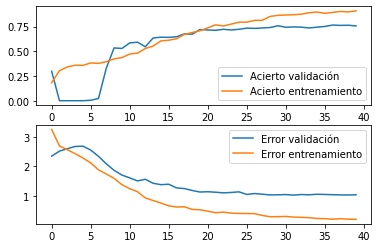

36/36 [==============================] - 1s 28ms/step - loss: 1.0344 - categorical_accuracy: 0.7646
Acierto en el entrenamiento: 97.31%
Acierto en la validación: 76.46%
	Áreas bajo la curva ROC para las distintas clases en la partición 1:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9622135093626322

		Media y desvío AUC ROC de la clase inhibitor: 0.9329707183131066

		Media y desvío AUC ROC de la clase agonist: 0.9163325583602202

		Media y desvío AUC ROC de la clase antagonist: 0.8755330730874029

		Media y desvío AUC ROC de la clase cofactor: 0.9770639268433057

		Media y desvío AUC ROC de la clase binder: 0.7053629823413996

		Media y desvío AUC ROC de la clase inducer: 0.8647006255585344

		Media y desvío AUC ROC de la clase antibody: 0.9822704081632653

		Media y desvío AUC ROC de la clase partial agonist: 0.8680160142348755

		Media y desvío AUC ROC de la clase ligand: 0.9490429712257574

		Media y desvío AUC ROC de la clase product of: 0.9214095576118647

		Media y d

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # Compatibilidad entre Python 2 y 3

from keras.models import Model, load_model
from keras.layers import Input, Embedding, Conv1D, BatchNormalization, Activation, GlobalMaxPooling1D, Dropout, concatenate, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import backend as K

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np
import matplotlib.pyplot as pplt
import statistics
import os

areas_roc = list()
resultados_finales = list()

kfold = StratifiedKFold(n_splits=PARTICIONES, shuffle=True)

y_para_split = [y.tolist().index(1) for y in y_entrenamiento]
i = 0
for train_index, val_index in kfold.split(x_entrenamiento, y_para_split):
  i += 1
  cantidad_ejemplos_entrenamiento = len(train_index)
  cantidad_ejemplos_validacion = len(val_index)

  ''' Arquitectura del modelo '''
  formato_entrada = (maxima_longitud_ejemplos,)

  # Capa de entrada
  entrada = Input(formato_entrada)

  # Capa de embedding
  embedding = Embedding(input_dim=matriz_embeddings.shape[0],
                        output_dim=DIMENSION_EMBEDDINGS,
                        input_length=maxima_longitud_ejemplos,
                        weights=[matriz_embeddings],#)(entrada)
                        trainable=ENTRENABLES)(entrada)

  # embedding = Embedding(input_dim=matriz_embeddings.shape[0],
  #                       output_dim=DIMENSION_EMBEDDINGS,
  #                       input_length=maxima_longitud_ejemplos)(entrada)

  # Capas de convolución y pooling
  capas = list()
  for j in range(0, len(DIMENSION_KERNEL), 1):
    convolucion = Conv1D(filters=CANTIDAD_FILTROS,
                        kernel_size=DIMENSION_KERNEL[j],
                        padding='same',
                        use_bias=False)(embedding)
    batch_normalization = BatchNormalization()(convolucion)
    activacion = Activation(ACTIVACION_OCULTA)(batch_normalization)
    # activacion = convolucion
    pooling = GlobalMaxPooling1D()(activacion)
    dropout = Dropout(PORCENTAJE_DROPEO)(pooling)
    # dropout = pooling
    capas.append(dropout)

  # Concatenación de las convoluciones y poolings
  if len(DIMENSION_KERNEL) > 1:
    convoluciones_poolings = concatenate(capas)
  else:
    convoluciones_poolings = capas[0]
  
  # Capas ocultas
  ultima_capa = convoluciones_poolings
  dense = 0
  for j in range(0, CAPAS_OCULTAS, 1):
    if j == 0:
      dense = Dense(NEURONAS_OCULTAS, use_bias=False)(convoluciones_poolings)
    else:
      dense = Dense(NEURONAS_OCULTAS, use_bias=False)(ultima_capa)
    batch_normalization = BatchNormalization()(dense)
    activacion = Activation(ACTIVACION_OCULTA)(batch_normalization)
    # activacion = dense
    dropout = Dropout(PORCENTAJE_DROPEO)(activacion)
    # dropout = activacion
    ultima_capa = dropout
  
  # Capa de salida
  dense3 = Dense(NEURONAS_SALIDA, activation=ACTIVACION_SALIDA)(ultima_capa)
  # modelo_cnn = Model(input=entrada, output=dense3)
  modelo_cnn = Model(entrada, dense3)

  # Se guarda la arquitectura del modelo en un archivo de imagen
  plot_model(modelo_cnn, to_file=modelo_arquitectura_ruta)
  ''' Arquitectura del modelo '''

  modelo_cnn.compile(optimizer=OPTIMIZADOR,
                     loss=FUNCION_ERROR,
                     metrics=[METRICA])

  # Callbacks
  bajar_velocidad = ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.1,
                                      patience=2,
                                      verbose=1,
                                      mode='auto',
                                      min_delta=0.0001,
                                      cooldown=0,
                                      min_lr=0)

  parada_temprana_val_loss = EarlyStopping(monitor='val_loss',
                                           patience=4,
                                           mode='auto',
                                           verbose=1)                                                     

  modelo_punto_de_control = ModelCheckpoint(modelo_guardado_ruta.format(i),
                                            monitor="val_categorical_accuracy",
                                            mode="auto",
                                            save_best_only=True,
                                            verbose=1)

  modelo_cnn.summary() # Detalles del modelo

  print("Particion: {}/{}".format(i, PARTICIONES))

  registro = modelo_cnn.fit(x=x_entrenamiento[train_index],
                            y=y_entrenamiento[train_index],
                            epochs=CANTIDAD_EPOCAS,
                            # callbacks=[parada_temprana_val_loss, bajar_velocidad, modelo_punto_de_control],
                            callbacks=[modelo_punto_de_control],
                            validation_data=(x_entrenamiento[val_index], y_entrenamiento[val_index]),
                            verbose=1,
                            class_weight=interacciones_pesos_dict,
                            batch_size=DIMENSION_BATCH)

  pplt.figure()
  pplt.subplot(2,1,1)
  pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
  pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
  pplt.legend()
  
  pplt.subplot(2,1,2)
  pplt.plot(registro.history["val_loss"], label="Error validación")
  pplt.plot(registro.history["loss"], label="Error entrenamiento")
  pplt.legend()
  
  analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_{}.png".format(i))
  pplt.savefig(analisis_entrenamiento_ruta)
  pplt.show()

  # pplt.plot(registro.history["loss"], label="Error entrenamiento")
  # pplt.plot(registro.history["val_loss"], label="Error validación")
  # pplt.plot(registro.history["accuracy"], label="Acierto entrenamiento")
  # pplt.plot(registro.history["val_accuracy"], label="Acierto validación")
  # pplt.legend()
  # pplt.show()

  # del modelo_cnn
  modelo_cnn = load_model(modelo_guardado_ruta.format(i))

  _, acierto_entrenamiento = modelo_cnn.evaluate(x_entrenamiento[train_index], y_entrenamiento[train_index])
  _, acierto_validacion = modelo_cnn.evaluate(x_entrenamiento[val_index], y_entrenamiento[val_index])
  resultados_finales.append([acierto_entrenamiento, acierto_validacion])

  print("Acierto en el entrenamiento: {}%".format("%.2f" % (acierto_entrenamiento*100)))
  print("Acierto en la validación: {}%".format("%.2f" % (acierto_validacion*100)))

  y_prediccion = modelo_cnn.predict(x_entrenamiento[val_index])
  razon_falsos_positivos = dict()
  razon_verdaderos_positivos = dict()
  area_bajo_curva_roc = dict()
  for j in range(cantidad_clases):
      razon_falsos_positivos[j], razon_verdaderos_positivos[j], _ = roc_curve(y_entrenamiento[val_index][:, j], y_prediccion[:, j])
      area_bajo_curva_roc[j] = auc(razon_falsos_positivos[j], razon_verdaderos_positivos[j])
  areas_roc.append(area_bajo_curva_roc)

  print("\tÁreas bajo la curva ROC para las distintas clases en la partición {}:".format(i))
  for j in range(0, len(area_bajo_curva_roc), 1):
      print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[j], area_bajo_curva_roc[j]))

  # Limpieza de memoria
  # del modelo_cnn
  # del registro
  K.clear_session()
# Fin del for de repeticiones

resultados_finales = np.asarray(resultados_finales)

# Medias
promedio_acierto_entrenamiento = statistics.mean(resultados_finales[:, 0])
promedio_acierto_validacion = statistics.mean(resultados_finales[:, 1])
# promedio_acierto_prueba = statistics.mean(resultados_finales[:, 2])

# Desvíos estándar
desvio_acierto_entrenamiento = statistics.stdev(resultados_finales[:, 0])
desvio_acierto_validacion = statistics.stdev(resultados_finales[:, 1])
# desvio_acierto_prueba = statistics.stdev(resultados_finales[:, 2])

# AUC's ROC
promedios_desvios_auc_roc = dict()
for i in range(0, cantidad_clases, 1):
    lista = list()
    for j in range(0, PARTICIONES, 1):
        area = areas_roc[j][i]
        lista.append(area)
    media = statistics.mean(lista)
    desvio = statistics.stdev(lista)
    promedios_desvios_auc_roc[i] = [media, desvio]


mejor = -1
mejor_acierto = -1
for k in range(PARTICIONES):
    model = load_model(modelo_guardado_ruta.format(k+1))
    _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
    if acierto > mejor_acierto:
        mejor_acierto = acierto
        mejor = k+1

os.rename(modelo_guardado_ruta.format(mejor), modelo_guardado_ruta.format("final"))

# RNN.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 52)           26329212  
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29952     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                1105      
_________________________________________________________________
activation_3 (Activation)    (None, 17)                0         
Total params: 26,360,269
Trainable params: 31,057
Non-trainable params: 26,329,212
_________________________________________________________________
Particion: 1/3
Train on 2266 samples, validate on 1134 samples
Epoch 1/40
2266/2266 [==================

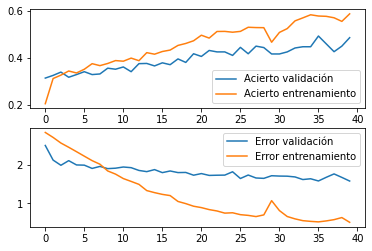

1134/1134 [==============================] - 1s 613us/step
Acierto en el entrenamiento: 63.37%
Acierto en la validación: 49.29%
	Áreas bajo la curva ROC para las distintas clases en la partición 1:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9766026493000177

		Media y desvío AUC ROC de la clase inhibitor: 0.7556477813410469

		Media y desvío AUC ROC de la clase agonist: 0.7326313104953501

		Media y desvío AUC ROC de la clase antagonist: 0.7504646532694147

		Media y desvío AUC ROC de la clase cofactor: 0.8249738878349285

		Media y desvío AUC ROC de la clase binder: 0.6978621648136036

		Media y desvío AUC ROC de la clase inducer: 0.7083705689603813

		Media y desvío AUC ROC de la clase antibody: 0.8694515306122449

		Media y desvío AUC ROC de la clase partial agonist: 0.8154804270462632

		Media y desvío AUC ROC de la clase ligand: 0.768284953733046

		Media y desvío AUC ROC de la clase product of: 0.8887057928761566

		Media y desvío AUC ROC de la clase multitarget: 0.7

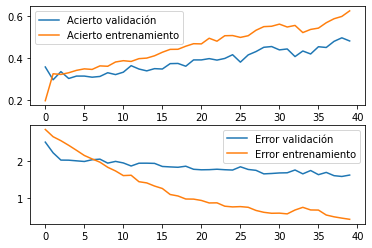

1133/1133 [==============================] - 1s 578us/step
Acierto en el entrenamiento: 65.77%
Acierto en la validación: 49.78%
	Áreas bajo la curva ROC para las distintas clases en la partición 2:
		Media y desvío AUC ROC de la clase sin_interaccion: 0.9729485956779855

		Media y desvío AUC ROC de la clase inhibitor: 0.786028303466756

		Media y desvío AUC ROC de la clase agonist: 0.7535132716969878

		Media y desvío AUC ROC de la clase antagonist: 0.7605220375722545

		Media y desvío AUC ROC de la clase cofactor: 0.9047045018135268

		Media y desvío AUC ROC de la clase binder: 0.7688200638245642

		Media y desvío AUC ROC de la clase inducer: 0.6912343470483006

		Media y desvío AUC ROC de la clase antibody: 0.8273969105068302

		Media y desvío AUC ROC de la clase partial agonist: 0.8115761353517364

		Media y desvío AUC ROC de la clase ligand: 0.498350672418168

		Media y desvío AUC ROC de la clase product of: 0.8388733823902563

		Media y desvío AUC ROC de la clase multitarget: 0.91

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Embedding, Activation, Dropout, Dense, GRU, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import backend as K

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import numpy as np
import matplotlib.pyplot as pplt
import statistics

areas_roc = list()
resultados_finales = list()

kfold = StratifiedKFold(n_splits=PARTICIONES, shuffle=True)

y_para_split = [y.tolist().index(1) for y in y_entrenamiento]
i = 0
for train_index, val_index in kfold.split(x_entrenamiento, y_para_split):
    i += 1

    model = Sequential()
    model.add(Embedding(input_dim=matriz_embeddings.shape[0],
                        output_dim=DIMENSION_EMBEDDINGS,
                        input_length=maxima_longitud_ejemplos,
                        weights=[matriz_embeddings],
                        trainable=ENTRENABLES))
    # model.add(Dropout(0.1))
    # model.add(Bidirectional(LSTM(64)))
    # model.add(LSTM(units=UNIDADES_LSTM, dropout=PORCENTAJE_DROPEO))
    # model.add(Bidirectional(GRU(units=UNIDADES_LSTM)))
    model.add(LSTM(UNIDADES_LSTM))
    model.add(Dropout(PORCENTAJE_DROPEO))
    model.add(Dense(NEURONAS_SALIDA))
    model.add(Activation(ACTIVACION_SALIDA))
    model.compile(optimizer=OPTIMIZADOR, loss=FUNCION_ERROR, metrics=[METRICA])
    model.summary()

    # Se guarda la arquitectura del modelo en un archivo de imagen
    plot_model(model, to_file=modelo_rnn_arquitectura_ruta.format(i))

    # Callbacks
    bajar_velocidad = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.1,
                                        patience=10,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.0001,
                                        cooldown=0,
                                        min_lr=0)

    parada_temprana_val_loss = EarlyStopping(monitor='val_loss',
                                            patience=20,
                                            mode='auto',
                                            verbose=1)                                                     

    modelo_punto_de_control = ModelCheckpoint(modelo_rnn_guardado_ruta.format(i),
                                              monitor="val_categorical_accuracy",
                                              mode="auto",
                                              save_best_only=True,
                                              verbose=1)
    
    print("Particion: {}/{}".format(i, PARTICIONES))

    registro = model.fit(x=x_entrenamiento[train_index],
                         y=y_entrenamiento[train_index],
                         epochs=CANTIDAD_EPOCAS,
                         callbacks=[bajar_velocidad, modelo_punto_de_control],
                         validation_data=(x_entrenamiento[val_index], y_entrenamiento[val_index]),
                         verbose=1,
                         class_weight=interacciones_pesos_dict,
                         batch_size=DIMENSION_BATCH)


    pplt.figure()
    pplt.subplot(2,1,1)
    pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
    pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
    pplt.legend()
    
    pplt.subplot(2,1,2)
    pplt.plot(registro.history["val_loss"], label="Error validación")
    pplt.plot(registro.history["loss"], label="Error entrenamiento")
    pplt.legend()
    
    analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_{}.png".format(i))
    pplt.savefig(analisis_entrenamiento_ruta)
    pplt.show()

    model = load_model(modelo_rnn_guardado_ruta.format(i))

    _, acierto_entrenamiento = model.evaluate(x_entrenamiento[train_index], y_entrenamiento[train_index])
    _, acierto_validacion = model.evaluate(x_entrenamiento[val_index], y_entrenamiento[val_index])
    resultados_finales.append([acierto_entrenamiento, acierto_validacion])

    print("Acierto en el entrenamiento: {}%".format("%.2f" % (acierto_entrenamiento*100)))
    print("Acierto en la validación: {}%".format("%.2f" % (acierto_validacion*100)))

    y_prediccion = model.predict(x_entrenamiento[val_index])
    razon_falsos_positivos = dict()
    razon_verdaderos_positivos = dict()
    area_bajo_curva_roc = dict()
    for j in range(NEURONAS_SALIDA):
        razon_falsos_positivos[j], razon_verdaderos_positivos[j], _ = roc_curve(y_entrenamiento[val_index][:, j], y_prediccion[:, j])
        area_bajo_curva_roc[j] = auc(razon_falsos_positivos[j], razon_verdaderos_positivos[j])
    areas_roc.append(area_bajo_curva_roc)

    print("\tÁreas bajo la curva ROC para las distintas clases en la partición {}:".format(i))
    for j in range(0, len(area_bajo_curva_roc), 1):
        print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[j], area_bajo_curva_roc[j]))

    # Limpieza de memoria
    del model
    del registro
    K.clear_session()
    # Fin del for de repeticiones

resultados_finales = np.asarray(resultados_finales)

# Medias
promedio_acierto_entrenamiento = statistics.mean(resultados_finales[:, 0])
promedio_acierto_validacion = statistics.mean(resultados_finales[:, 1])
# promedio_acierto_prueba = statistics.mean(resultados_finales[:, 2])

# Desvíos estándar
desvio_acierto_entrenamiento = statistics.stdev(resultados_finales[:, 0])
desvio_acierto_validacion = statistics.stdev(resultados_finales[:, 1])
# desvio_acierto_prueba = statistics.stdev(resultados_finales[:, 2])

# AUC's ROC
promedios_desvios_auc_roc = dict()
for i in range(0, NEURONAS_SALIDA, 1):
    lista = list()
    for j in range(0, PARTICIONES, 1):
        area = areas_roc[j][i]
        lista.append(area)
    media = statistics.mean(lista)
    desvio = statistics.stdev(lista)
    promedios_desvios_auc_roc[i] = [media, desvio]


mejor = -1
mejor_acierto = -1
for k in range(PARTICIONES):
    model = load_model(modelo_rnn_guardado_ruta.format(k))
    _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
    if acierto > mejor_acierto:
        mejor_acierto = acierto
        mejor = k

os.rename(modelo_rnn_guardado_ruta.format(mejor), modelo_rnn_guardado_ruta.format("final"))


# Transformers: clases

In [ ]:
# from __future__ import absolute_import, division, print_function, unicode_literals # Compatibilidad entre Python 2 y 3

from tensorflow.keras.layers import Embedding

from tensorflow import keras
from tensorflow.keras import layers

# Implement multi head self attention as a Keras layer

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        # super(MultiHeadSelfAttention, self).__init__()
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)
        #
        self.num_heads = num_heads
        self.embed_dim = embed_dim

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)  # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_heads': self.num_heads,
            # 'ff_dim': self.ff_dim,
            'embed_dim': self.embed_dim,
            # 'rate': self.rate,
            # 'units': self.units,
            # 'd_model': self.d_model,
            # 'num_heads': self.num_heads,
            # 'dropout': self.dropout,
        })
        return config

# Implement a Transformer block as a layer

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super().__init__(**kwargs)
        # super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.embed_dim = embed_dim
        self.rate = rate

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'embed_dim': self.embed_dim,
            'rate': self.rate,
            # 'units': self.units,
            # 'd_model': self.d_model,
            # 'num_heads': self.num_heads,
            # 'dropout': self.dropout,
        })
        return config

# Implement embedding layer
# Two seperate embedding layers, one for tokens, one for token index (positions).

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, **kwargs): # pesos=None, trainable=False
        # super(TokenAndPositionEmbedding, self).__init__()
        super().__init__(**kwargs)
        
        # self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, weights=pesos, trainable=trainable)
        # self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim, trainable=trainable)
        
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        #
        # super().__init__(**kwargs)
        self.vocab_size = vocab_size
        self.maxlen = maxlen
        self.embed_dim = embed_dim
        # self.pesos = pesos
        # self.trainable = trainable
        # self.d_model = d_model
        # self.num_heads = num_heads
        # self.dropout = dropout

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'vocab_size': self.vocab_size,
            'maxlen': self.maxlen,
            'embed_dim': self.embed_dim,
            # 'num_layers': self.num_layers,
            # 'units': self.units,
            # 'd_model': self.d_model,
            # 'num_heads': self.num_heads,
            # 'dropout': self.dropout,
        })
        return config

# Transformers: particiones

In [ ]:
from sklearn.model_selection import StratifiedKFold
import pickle

kfold = StratifiedKFold(n_splits=PARTICIONES, shuffle=True)
y_para_split = [y.tolist().index(1) for y in y_entrenamiento]

datos_particion = list()

for train_index, val_index in kfold.split(x_entrenamiento, y_para_split):
  datos_particion.append([train_index, val_index])

with open(particiones_ruta, "wb") as handle: # Guardar vocabulario en disco
  pickle.dump(datos_particion, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(datos_particion)

[[array([   0,    3,    5, ..., 3395, 3398, 3399]), array([   1,    2,    4, ..., 3394, 3396, 3397])], [array([   0,    1,    2, ..., 3394, 3396, 3397]), array([   3,    6,   11, ..., 3395, 3398, 3399])], [array([   1,    2,    3, ..., 3397, 3398, 3399]), array([   0,    5,    8, ..., 3388, 3389, 3392])]]


# Transformers: entrenamiento

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 20000)]           0         
_________________________________________________________________
token_and_position_embedding (None, 20000, 52)         27369264  
_________________________________________________________________
transformer_block_3 (Transfo (None, 20000, 52)         22204     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 52)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 17)                901       
Total params: 27,392,369
Trainable params: 27,392,369
Non-trainable params: 0
_________________________________________________________________
Particion: 2/3
Epoch 1/40
2267/2267 [==============================] - ETA: 0s - loss: 2.9750 - categorical_accur

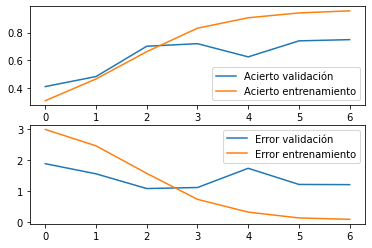

In [ ]:
# from __future__ import absolute_import, division, print_function, unicode_literals # Compatibilidad entre Python 2 y 3

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, Activation, GlobalMaxPooling1D, Dropout, concatenate, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pplt
import statistics
import os
import pickle

with open(particiones_ruta, "rb") as handle:
  datos_particion = pickle.load(handle)

i = 1 # Asignar número de partición-1

train_index = datos_particion[i][0]
val_index = datos_particion[i][1]

cantidad_ejemplos_entrenamiento = len(train_index)
cantidad_ejemplos_validacion = len(val_index)

i += 1

''' Arquitectura del modelo '''
formato_entrada = (maxima_longitud_ejemplos,)

# Capa de entrada
entrada = Input(formato_entrada)

# Capa de embedding
capa_embedding = TokenAndPositionEmbedding(maxima_longitud_ejemplos,
                                           matriz_embeddings.shape[0],
                                           DIMENSION_EMBEDDINGS)
embedding = capa_embedding(entrada)

bloque_transformer = TransformerBlock(DIMENSION_EMBEDDINGS, NUM_HEADS, FF_DIM)
transformer = bloque_transformer(embedding)

pooling = GlobalAveragePooling1D()(transformer)

# Capas ocultas
ultima_capa = pooling
dense = 0
for j in range(0, CAPAS_OCULTAS, 1):
  if j == 0:
    dense = Dense(NEURONAS_OCULTAS, use_bias=False)(pooling)
  else:
    dense = Dense(NEURONAS_OCULTAS, use_bias=False)(ultima_capa)
  batch_normalization = BatchNormalization()(dense)
  activacion = Activation(ACTIVACION_OCULTA)(batch_normalization)
  dropout = Dropout(PORCENTAJE_DROPEO)(activacion)
  ultima_capa = dropout

# Capa de salida
dense3 = Dense(NEURONAS_SALIDA, activation=ACTIVACION_SALIDA)(ultima_capa)
# modelo_cnn = Model(input=entrada, output=dense3)
modelo_cnn = Model(entrada, dense3)

# Se guarda la arquitectura del modelo en un archivo de imagen
plot_model(modelo_cnn, to_file=modelo_transformers_arquitectura_ruta)
''' Arquitectura del modelo '''

modelo_cnn.compile(optimizer=OPT,
                   loss=FUNCION_ERROR,
                   metrics=[METRICA])

# Callbacks
bajar_velocidad = ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1,
                                    patience=2,
                                    verbose=1,
                                    mode='auto',
                                    min_delta=0.0001,
                                    cooldown=0,
                                    min_lr=0)

parada_temprana_val_loss = EarlyStopping(monitor='val_loss',
                                          patience=4,
                                          mode='auto',
                                          verbose=1)                                                     

modelo_punto_de_control = ModelCheckpoint(modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, i),
                                          monitor="val_categorical_accuracy",
                                          mode="auto",
                                          save_best_only=True,
                                          verbose=1)

modelo_cnn.summary() # Detalles del modelo

print("Particion: {}/{}".format(i, PARTICIONES))

registro = modelo_cnn.fit(x=x_entrenamiento[train_index],
                          y=y_entrenamiento[train_index],
                          epochs=CANTIDAD_EPOCAS,
                          callbacks=[parada_temprana_val_loss, bajar_velocidad, modelo_punto_de_control],
                          # callbacks=[modelo_punto_de_control],
                          validation_data=(x_entrenamiento[val_index], y_entrenamiento[val_index]),
                          verbose=1,
                          class_weight=interacciones_pesos_dict,
                          batch_size=DIMENSION_BATCH)

pplt.figure()
pplt.subplot(2,1,1)
pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
pplt.legend()

pplt.subplot(2,1,2)
pplt.plot(registro.history["val_loss"], label="Error validación")
pplt.plot(registro.history["loss"], label="Error entrenamiento")
pplt.legend()

analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_{}.png".format(i))
pplt.savefig(analisis_entrenamiento_ruta)
pplt.show()

# Limpieza de memoria
# del modelo_cnn
# del registro
K.clear_session()

# Transformers: evaluación

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K

from sklearn.metrics import roc_curve, auc

import statistics
import numpy as np
import tensorflow as tf

K.clear_session()

areas_roc = list()
resultados_finales = list()

with open(particiones_ruta, "rb") as handle:
  datos_particion = pickle.load(handle)

for i in range(1, PARTICIONES+1, 1):
  
  train_index = datos_particion[i-1][0]
  val_index = datos_particion[i-1][1]

  modelo_cnn = tf.keras.models.load_model(modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, i), custom_objects={'TokenAndPositionEmbedding':TokenAndPositionEmbedding,
                                                                                                                                                       'TransformerBlock':TransformerBlock,
                                                                                                                                                       'MultiHeadSelfAttention':MultiHeadSelfAttention})
  
  print("Modelo cargado con éxito: {}".format(modelo_cnn))

  # _, acierto_entrenamiento = modelo_cnn.evaluate(x_entrenamiento[train_index][0:2], y_entrenamiento[train_index][0:2])
  # _, acierto_validacion = modelo_cnn.evaluate(x_entrenamiento[val_index][0:2], y_entrenamiento[val_index][0:2])
  # resultados_finales.append([acierto_entrenamiento, acierto_validacion])

  suma = 0
  for k in range(0, len(train_index), 1):
    print("Ejemplos: {}/{}".format(k+1, len(train_index)))
    y_prediccion = modelo_cnn.predict(x_entrenamiento[[train_index[k]]])
    if np.argmax(y_prediccion[0]) == np.argmax(y_entrenamiento[train_index[k]]):
      suma += 1
  acierto_entrenamiento = suma/len(train_index)

  suma = 0
  predicciones = list()
  for k in range(0, len(val_index), 1):
    print("Ejemplos: {}/{}".format(k+1, len(val_index)))
    y_prediccion = modelo_cnn.predict(x_entrenamiento[[val_index[k]]])
    predicciones.append(y_prediccion[0])
    if np.argmax(y_prediccion[0]) == np.argmax(y_entrenamiento[val_index[k]]):
      suma += 1
  acierto_validacion = suma/len(val_index)

  resultados_finales.append([acierto_entrenamiento, acierto_validacion])
    
  print("Acierto en el entrenamiento: {}%".format("%.2f" % (acierto_entrenamiento*100)))
  print("Acierto en la validación: {}%".format("%.2f" % (acierto_validacion*100)))

  predicciones = np.asarray(predicciones)

  razon_falsos_positivos = dict()
  razon_verdaderos_positivos = dict()
  area_bajo_curva_roc = dict()
  for j in range(cantidad_clases):
      razon_falsos_positivos[j], razon_verdaderos_positivos[j], _ = roc_curve(y_entrenamiento[val_index][:, j], predicciones[:, j])
      area_bajo_curva_roc[j] = auc(razon_falsos_positivos[j], razon_verdaderos_positivos[j])
  areas_roc.append(area_bajo_curva_roc)

  print("\tÁreas bajo la curva ROC para las distintas clases en la partición {}:".format(i))
  for j in range(0, len(area_bajo_curva_roc), 1):
      print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[j], area_bajo_curva_roc[j]))

  # Limpieza de memoria
  # del modelo_cnn
  # del registro
  K.clear_session()
# Fin del for de repeticiones

resultados_finales = np.asarray(resultados_finales)

# Medias
promedio_acierto_entrenamiento = statistics.mean(resultados_finales[:, 0])
promedio_acierto_validacion = statistics.mean(resultados_finales[:, 1])

# Desvíos estándar
desvio_acierto_entrenamiento = statistics.stdev(resultados_finales[:, 0])
desvio_acierto_validacion = statistics.stdev(resultados_finales[:, 1])

# AUC's ROC
promedios_desvios_auc_roc = dict()
for i in range(0, cantidad_clases, 1):
    lista = list()
    for j in range(0, PARTICIONES, 1):
        area = areas_roc[j][i]
        lista.append(area)
    media = statistics.mean(lista)
    desvio = statistics.stdev(lista)
    promedios_desvios_auc_roc[i] = [media, desvio]

with open(resultados_ruta, "w" ,encoding="utf8") as archivo:
  archivo.writelines([str(promedio_acierto_entrenamiento*100), ",", str(desvio_acierto_entrenamiento*100), "\n"])
  archivo.writelines([str(promedio_acierto_validacion*100), ",", str(desvio_acierto_validacion*100), "\n"])
  archivo.write("\n")
  for valores in promedios_desvios_auc_roc.values():
    archivo.writelines([str(valores[0]), ",", str(valores[1]), "\n"])


'''Selección del modelo final'''
mejor = -1
mejor_acierto = -1
for k in range(0, PARTICIONES, 1):
  model = tf.keras.models.load_model(modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, k+1), custom_objects={'TokenAndPositionEmbedding':TokenAndPositionEmbedding,
                                                                                                                                                    'TransformerBlock':TransformerBlock,
                                                                                                                                                    'MultiHeadSelfAttention':MultiHeadSelfAttention})
  # _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)

  suma = 0
  for i in range(0, len(x_entrenamiento), 1):
    print("Ejemplos: {}/{}".format(i+1, len(x_entrenamiento)))
    y_prediccion = model.predict(x_entrenamiento[[i]])
    if np.argmax(y_prediccion[0]) == np.argmax(y_entrenamiento[i]):
      suma += 1
  acierto = suma/len(x_entrenamiento)

  if acierto > mejor_acierto:
      mejor_acierto = acierto
      mejor = k+1
# Fin del for de particiones

os.rename(modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, mejor),
          modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, "final"))

Se han truncado las últimas 5000 líneas del flujo de salida.
Ejemplos: 1802/3400
Ejemplos: 1803/3400
Ejemplos: 1804/3400
Ejemplos: 1805/3400
Ejemplos: 1806/3400
Ejemplos: 1807/3400
Ejemplos: 1808/3400
Ejemplos: 1809/3400
Ejemplos: 1810/3400
Ejemplos: 1811/3400
Ejemplos: 1812/3400
Ejemplos: 1813/3400
Ejemplos: 1814/3400
Ejemplos: 1815/3400
Ejemplos: 1816/3400
Ejemplos: 1817/3400
Ejemplos: 1818/3400
Ejemplos: 1819/3400
Ejemplos: 1820/3400
Ejemplos: 1821/3400
Ejemplos: 1822/3400
Ejemplos: 1823/3400
Ejemplos: 1824/3400
Ejemplos: 1825/3400
Ejemplos: 1826/3400
Ejemplos: 1827/3400
Ejemplos: 1828/3400
Ejemplos: 1829/3400
Ejemplos: 1830/3400
Ejemplos: 1831/3400
Ejemplos: 1832/3400
Ejemplos: 1833/3400
Ejemplos: 1834/3400
Ejemplos: 1835/3400
Ejemplos: 1836/3400
Ejemplos: 1837/3400
Ejemplos: 1838/3400
Ejemplos: 1839/3400
Ejemplos: 1840/3400
Ejemplos: 1841/3400
Ejemplos: 1842/3400
Ejemplos: 1843/3400
Ejemplos: 1844/3400
Ejemplos: 1845/3400
Ejemplos: 1846/3400
Ejemplos: 1847/3400
Ejemplos: 1848/3400

# Gráficos.

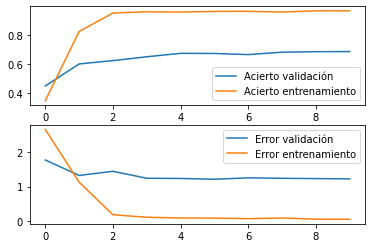

In [ ]:
import matplotlib.pyplot as pplt
import os

pplt.figure()
pplt.subplot(2,1,1)
pplt.plot(registro.history["val_categorical_accuracy"], label="Acierto validación")
pplt.plot(registro.history["categorical_accuracy"], label="Acierto entrenamiento")
# aciertos_ruta = os.path.join(pfc_datos_google_drive_ruta, "aciertos.png")
pplt.legend()
# pplt.savefig(aciertos_ruta)
# pplt.show()

# pplt.figure()
pplt.subplot(2,1,2)
pplt.plot(registro.history["val_loss"], label="Error validación")
pplt.plot(registro.history["loss"], label="Error entrenamiento")
# errores_ruta = os.path.join(pfc_datos_google_drive_ruta, "errores.png")
pplt.legend()
analisis_entrenamiento_ruta = os.path.join(pfc_datos_google_drive_ruta, "analisis_entrenamiento_sinsin_20000.png")
pplt.savefig(analisis_entrenamiento_ruta)
pplt.show()

# Limpiar memoria

In [ ]:
from keras import backend as K

K.clear_session()

# Detalles de ejecución.

In [ ]:
print("Características de los datos de entrada:")
# print("\tCantidad de ejemplos para entrenamiento: {} ({}%)".format(cantidad_ejemplos_entrenamiento, (1-PORCENTAJE_VALIDACION)*100))
# print("\tCantidad de ejemplos para validación: {} ({}%)".format(cantidad_ejemplos_validacion, PORCENTAJE_VALIDACION*100))
# print("\tCantidad de ejemplos utilizados para probar: {}".format(cantidad_ejemplos_prueba))
print("\tLongitud de los ejemplos: {}".format(maxima_longitud_ejemplos))

print("Parámetros:")
print("\tCantidad de particiones: {}".format(PARTICIONES))
print("\tCantidad de épocas: {}".format(CANTIDAD_EPOCAS))
print("\tDropout: {}".format(PORCENTAJE_DROPEO))
print("\tDimension de los embeddings: {}".format(DIMENSION_EMBEDDINGS))
print("\tDimensión(es) de kernel(s): {}".format(DIMENSION_KERNEL))
print("\tCantidad de kernels por tipo: {}".format(CANTIDAD_FILTROS))
print("\tCantidad de capas ocultas: {}".format(CAPAS_OCULTAS))
print("\tCantidad de neuronas en la capa(s) oculta(s): {}".format(NEURONAS_OCULTAS))
print("\tActivación en la(s) capa(s) oculta(s): {}".format(ACTIVACION_OCULTA))
print("\tCantidad de neuronas en la capa de salida: {}".format(NEURONAS_SALIDA))
print("\tActivación en la capa de salida: {}".format(ACTIVACION_SALIDA))
print("\tOptimizador: {}".format(OPTIMIZADOR))
print("\tFunción de error: {}".format(FUNCION_ERROR))
print("\tMétrica: {}".format(METRICA))
print("\tDimensión batch: {}".format(DIMENSION_BATCH))

print("Resultados del entrenamiento:")
print("\tAcierto en el entrenamiento [media, desvío]: [{}% / {}%]".format("%.2f" % (promedio_acierto_entrenamiento*100), "%.2f" % (100*desvio_acierto_entrenamiento)))
print("\tAcierto en el validación [media, desvío]: [{}% / {}%]".format("%.2f" % (promedio_acierto_validacion*100), "%.2f" % (100*desvio_acierto_validacion)))
print("\tÁreas bajo la curva ROC para las distintas clases:")
for i in range(0, len(promedios_desvios_auc_roc), 1):
    print("\t\tMedia y desvío AUC ROC de la clase {}: {}\n".format(interacciones_lista[i], promedios_desvios_auc_roc[i]))

Características de los datos de entrada:
	Longitud de los ejemplos: 7500
Parámetros:
	Cantidad de particiones: 3
	Cantidad de épocas: 40
	Dropout: 0.4
	Dimension de los embeddings: 52
	Dimensión(es) de kernel(s): (1, 3, 5, 7, 9)
	Cantidad de kernels por tipo: 100
	Cantidad de capas ocultas: 1
	Cantidad de neuronas en la capa(s) oculta(s): 51
	Activación en la(s) capa(s) oculta(s): relu
	Cantidad de neuronas en la capa de salida: 17
	Activación en la capa de salida: softmax
	Optimizador: adam
	Función de error: categorical_crossentropy
	Métrica: categorical_accuracy
	Dimensión batch: 32
Resultados del entrenamiento:
	Acierto en el entrenamiento [media, desvío]: [96.28% / 3.63%]
	Acierto en el validación [media, desvío]: [62.56% / 1.03%]
	Áreas bajo la curva ROC para las distintas clases:
		Media y desvío AUC ROC de la clase sin_interaccion: [0.9815504877687897, 0.002334752599037815]

		Media y desvío AUC ROC de la clase inhibitor: [0.8851456675557695, 0.007476094412364127]

		Media y de

# Evaluación.

In [ ]:
import pickle
import tensorflow as tf

# mejor = -1
# mejor_acierto = -1
# for k in range(PARTICIONES):
#     k += 1
#     model = load_model(modelo_guardado_ruta.format(k))
#     _, acierto = model.evaluate(x_entrenamiento, y_entrenamiento)
#     if acierto > mejor_acierto:
#         mejor_acierto = acierto
#         mejor = k

# os.rename(modelo_guardado_ruta.format(mejor), modelo_guardado_ruta.format("final"))

with open(x_prueba_ruta, "rb") as handle:
    x_prueba = pickle.load(handle)
with open(y_prueba_ruta, "rb") as handle:
    y_prueba = pickle.load(handle)

# CNN
modelo_final_ruta = modelo_guardado_ruta.format("final")

# RNN
# modelo_final_ruta = modelo_rnn_guardado_ruta.format("final")

# TRANSFORMERS
# modelo_final_ruta = modelo_transformers_guardado_ruta.format(longitud, dimension_vectores_embedding_glove+2, "final")

MODELO_RUTA = modelo_final_ruta

modelo = load_model(MODELO_RUTA)
# modelo = tf.keras.models.load_model(MODELO_RUTA, custom_objects={'TokenAndPositionEmbedding':TokenAndPositionEmbedding,
#                                                                  'TransformerBlock':TransformerBlock,
#                                                                  'MultiHeadSelfAttention':MultiHeadSelfAttention})

suma = 0
for i in range(0, len(x_prueba), 1):
  print("Ejemplos: {}/{}".format(i+1, len(x_prueba)))
  y_prediccion = modelo.predict(x_prueba[[i]])
  if np.argmax(y_prediccion[0]) == np.argmax(y_prueba[i]):
    suma += 1
acierto = suma/len(x_prueba)

# error, acierto = modelo.evaluate(x_prueba, y_prueba)

print("Acierto en datos de prueba: {}%".format("%.2f" % (acierto*100)))
# print("Acierto en datos de prueba:", acierto)
# print("Error en datos de prueba:", error)

Ejemplos: 1/850
Ejemplos: 2/850
Ejemplos: 3/850
Ejemplos: 4/850
Ejemplos: 5/850
Ejemplos: 6/850
Ejemplos: 7/850
Ejemplos: 8/850
Ejemplos: 9/850
Ejemplos: 10/850
Ejemplos: 11/850
Ejemplos: 12/850
Ejemplos: 13/850
Ejemplos: 14/850
Ejemplos: 15/850
Ejemplos: 16/850
Ejemplos: 17/850
Ejemplos: 18/850
Ejemplos: 19/850
Ejemplos: 20/850
Ejemplos: 21/850
Ejemplos: 22/850
Ejemplos: 23/850
Ejemplos: 24/850
Ejemplos: 25/850
Ejemplos: 26/850
Ejemplos: 27/850
Ejemplos: 28/850
Ejemplos: 29/850
Ejemplos: 30/850
Ejemplos: 31/850
Ejemplos: 32/850
Ejemplos: 33/850
Ejemplos: 34/850
Ejemplos: 35/850
Ejemplos: 36/850
Ejemplos: 37/850
Ejemplos: 38/850
Ejemplos: 39/850
Ejemplos: 40/850
Ejemplos: 41/850
Ejemplos: 42/850
Ejemplos: 43/850
Ejemplos: 44/850
Ejemplos: 45/850
Ejemplos: 46/850
Ejemplos: 47/850
Ejemplos: 48/850
Ejemplos: 49/850
Ejemplos: 50/850
Ejemplos: 51/850
Ejemplos: 52/850
Ejemplos: 53/850
Ejemplos: 54/850
Ejemplos: 55/850
Ejemplos: 56/850
Ejemplos: 57/850
Ejemplos: 58/850
Ejemplos: 59/850
Ejempl